In [5]:
import yfinance as yf

import pandas as pd
import numpy as np

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

from pandas_datareader import data as web
from pandas import Series, DataFrame
import datetime
from operator import itemgetter # constructs a callable that assumes an iterable object (e.g. list, tuple, set) as input, and fetches the n-th element out of it.
from datetime import datetime
from datetime import datetime, timedelta

import statsmodels.api as sm

In [3]:
nflx = yf.download('NFLX', start='2017-10-28', end='2022-10-28')
nflx


[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-10-30  199.619995  201.100006  197.070007  198.369995  198.369995   
2017-10-31  198.210007  198.589996  195.220001  196.429993  196.429993   
2017-11-01  197.240005  199.199997  196.000000  198.000000  198.000000   
2017-11-02  197.449997  199.440002  197.089996  199.320007  199.320007   
2017-11-03  199.800003  200.550003  197.990005  200.009995  200.009995   
...                ...         ...         ...         ...         ...   
2022-10-21  268.950012  290.750000  265.679993  289.570007  289.570007   
2022-10-24  290.230011  290.489990  280.359985  282.450012  282.450012   
2022-10-25  286.950012  297.589996  285.549988  291.019989  291.019989   
2022-10-26  290.040009  305.630005  288.040009  298.619995  298.619995   
2022-10-27  298.329987  305.209991  294.779999  296.940002  296.940002   

              Volume  
Date                  
2017-10-30   5439600  
2017-10-31   5518600  
2017-11-01   5017400  
2017-11-02   3606300  
2017-11-03   3678800  
...              ...  
2022-10-21  24862700  
2022-10-24  13326400  
2022-10-25  15100700  
2022-10-26  15714100  
2022-10-27  14612600  

[1258 rows x 6 columns]

In [11]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(nflx['Close'])
plt.title('GBP / USD Closing price')
plt.show()

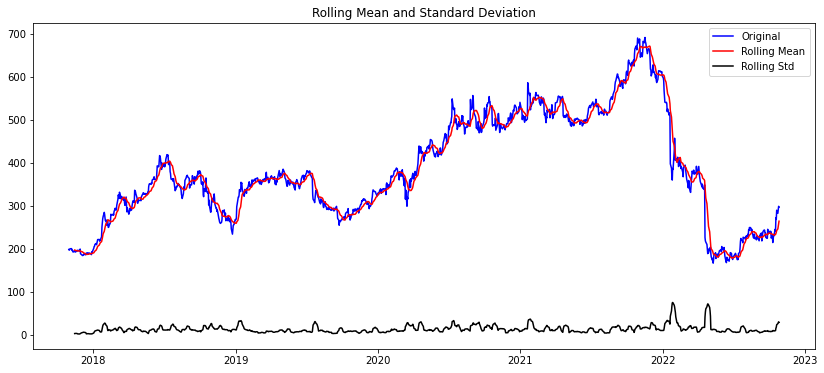

Results of dickey fuller test
Test Statistics                  -1.818392
p-value                           0.371370
No. of lags used                  1.000000
Number of observations used    1256.000000
critical value (1%)              -3.435567
critical value (5%)              -2.863844
critical value (10%)             -2.567997
dtype: float64


In [14]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(14,6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(nflx['Close'])

In [16]:
result = seasonal_decompose(nflx['Close'], model='multiplicative', period = 365)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 10)

<Figure size 432x288 with 0 Axes>

In [18]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(nflx['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [19]:
# making ARMIA
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4735.934, Time=0.15 sec


/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4734.778, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4734.709, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4737.934, Time=0.13 sec


/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4732.011, Time=0.43 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.965 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1129
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2369.967
Date:                Wed, 02 Nov 2022   AIC                          -4737.934
Time:                        09:10:23   BIC                          -4732.906
Sample:                             0   HQIC                         -4736.034
                               - 1129                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009    7.6e-06    115.315      0.000       0.001

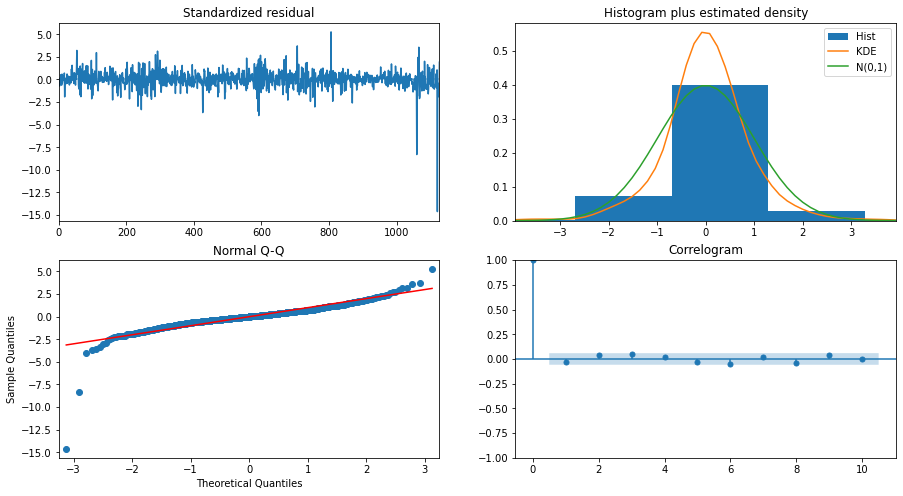

In [20]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [21]:
# Build Model
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit() #(disp=-1)  disp is optional boolean
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1129
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2369.967
Date:                Wed, 02 Nov 2022   AIC                          -4737.934
Time:                        09:10:40   BIC                          -4732.906
Sample:                             0   HQIC                         -4736.034
                               - 1129                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009    7.6e-06    115.315      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):             97570.96
Prob(Q):                              0.36   Pr

/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warning

In [27]:
# Forecast
fc = fitted.forecast(126, alpha=0.05)  # 95% conf

/Users/lucaalfano/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [29]:
test_data

Date
2022-04-29    5.248917
2022-05-02    5.295614
2022-05-03    5.297667
2022-05-04    5.318169
2022-05-05    5.238143
                ...   
2022-10-21    5.668397
2022-10-24    5.643502
2022-10-25    5.673392
2022-10-26    5.699172
2022-10-27    5.693530
Name: Close, Length: 126, dtype: float64

In [30]:
fc

1129    5.295915
1130    5.295915
1131    5.295915
1132    5.295915
1133    5.295915
          ...   
1250    5.295915
1251    5.295915
1252    5.295915
1253    5.295915
1254    5.295915
Name: predicted_mean, Length: 126, dtype: float64

In [31]:
# report performance
import math

mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))

mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))

rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))


MSE: 0.022582327958585186
MAE: 0.1282754819796639
RMSE: 0.15027417595377188


In [ ]:
# guided by this website
# https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/